In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # Handling class imbalance

import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("cleaned_data.csv")
df = data.copy()
print(df.shape)
df.head()

(529, 44)


,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,0,28,19.3,78,22,10.48,5,7.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,36,24.9,74,20,11.70,5,11.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,33,25.3,72,18,11.80,5,10.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,37,29.7,72,20,12.00,5,4.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,25,20.1,72,18,10.00,5,1.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
df.describe()

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
count,529.000000,529.000000,529.00000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,...,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.323251,31.425331,24.32344,73.474480,19.238185,11.152136,4.937618,7.651607,0.387524,0.283554,...,0.200378,0.024575,0.077505,0.003781,0.245747,0.030246,0.381853,0.035917,0.275992,0.724008
std,0.468161,5.430222,4.08396,2.709378,1.697809,0.866512,1.498068,4.801196,0.487646,0.684607,...,0.400662,0.154971,0.267644,0.061429,0.430937,0.171425,0.486301,0.186259,0.447436,0.447436
min,0.000000,20.000000,12.40000,70.000000,16.000000,8.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,21.60000,72.000000,18.000000,10.500000,5.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,31.000000,24.20000,72.000000,18.000000,11.000000,5.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,26.70000,74.000000,20.000000,11.700000,5.000000,10.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,48.000000,38.90000,82.000000,28.000000,14.800000,12.000000,30.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.keys()

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Pulse rate(bpm)', 'RR (breaths/min)',
       'Hb(g/dl)', 'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+',
       'Blood Group_AB-', 'Blood Group_B+', 'Blood Group_B-', 'Blood Group_O+',
       'Blood Group_O-', 'Menstrual Cycle(R/I)_irregular',
       'Menstrual Cycle(R/I)_regular'],
      dtype='object')

## Data Preparation
- Split dataset (80-20)
- Standardise features
- Handle class imbalance with SMOTE

In [10]:
# dependent variable
y= df['PCOS (Y/N)']
# independent variables
X= df.drop(['PCOS (Y/N)'], axis=1) 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# standardise featres
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# handle class imbalance with SMOTE (for oversampling)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

  File "c:\Users\XuanHuan.DESKTOP-SFCP3LA\Desktop\DSA4264\dsa4262_pcos\dsa4262_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## Logistic Regression

In [17]:
# define model with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [22]:
# perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
cv_auc_roc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc_ovr_weighted')

In [23]:
print(f"Cross-Validation Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean Accuracy: {cv_accuracy_scores.mean():.4f}")

print(f"Cross-Validation AUC-ROC Scores: {cv_auc_roc_scores}")
print(f"Mean AUC-ROC: {cv_auc_roc_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.85217391 0.91304348 0.85964912 0.95614035 0.85964912]
Mean Accuracy: 0.8881
Cross-Validation AUC-ROC Scores: [0.928      0.97900183 0.91296296 0.98302469 0.95740741]
Mean AUC-ROC: 0.9521


In [24]:
model.fit(X_train,y_train)

print("The intercept b0= ", model.intercept_)
print("The coefficient b1= ", model.coef_)

# predict test set
y_pred= model.predict(X_test)

The intercept b0=  [-1.2317361]
The coefficient b1=  [[-0.177338    0.42887029  0.36071058 -0.17661626 -0.20339529 -0.25343561
  -0.66402341 -0.17597928 -0.1758086  -0.43173873  0.52788355 -0.12288474
  -0.07212816  0.30808954  0.32639036  0.00407003 -0.1686687  -0.37867531
   0.33320047  0.64455479  0.8097344   0.5788484   0.32586929  0.55997374
   0.41339547  0.39172481 -0.12323121 -0.22245525  0.21130599  2.0487329
   0.25845633  0.18051686  0.06084908  0.05896134 -0.18355647 -0.1864967
  -0.1725264   0.17036272  0.20289409 -0.06611666 -0.08183108  0.28135771
  -0.28135771]]


[[63  9]
 [ 5 29]]


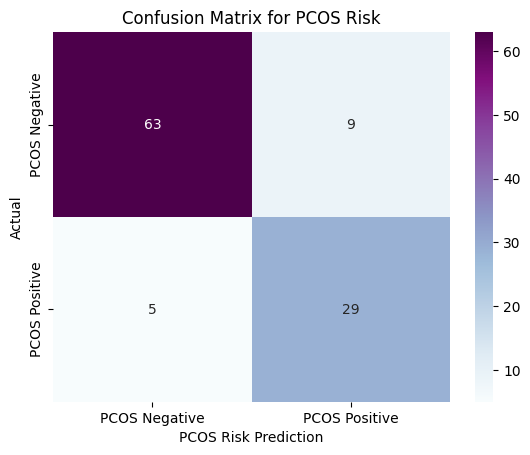

In [26]:
# confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for PCOS Risk');
ax.set_xlabel('PCOS Risk Prediction')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
ax.yaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
plt.show()

## Hyperparameter Tuning with GridSearchCV
- finding best parameters for best auc-roc score

In [36]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l1', 'l2'],  # regularization type
    'solver': ['liblinear']  # needed for L1 regularization
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='roc_auc_ovr_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Grid-Search AUC-ROC score: {grid_search.best_score_:.4f}")

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Grid-Search AUC-ROC score: 0.9641


In [37]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability scores for AUC-ROC

In [38]:
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC-ROC Score: {auc:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8396
Test AUC-ROC Score: 0.9547

Confusion Matrix:
 [[58 14]
 [ 3 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87        72
           1       0.69      0.91      0.78        34

    accuracy                           0.84       106
   macro avg       0.82      0.86      0.83       106
weighted avg       0.87      0.84      0.84       106



## Logistic Regression with RFE
- See if it improves model performance

- Steps:
    - Standardisation
    - SMOTE
    - RFE
    - K-fold cross validation
    - GridSearchCV

In [39]:
from sklearn.feature_selection import RFE

In [44]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# standardise features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [45]:
base_model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# use RFE to select top 10 features
rfe = RFE(base_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)  # apply same transformation to test set

# get selected feature indices
selected_features = np.where(rfe.support_)[0]
print(f"Selected Feature Indices: {selected_features}")


Selected Feature Indices: [ 6  9 10 14 19 20 21 23 29 41]


In [48]:
# perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)

cv_accuracy_scores = cross_val_score(model, X_train_rfe, y_train, cv=kf, scoring='accuracy')
cv_auc_roc_scores = cross_val_score(model, X_train_rfe, y_train, cv=kf, scoring='roc_auc_ovr_weighted')

print(f"Cross-Validation Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean Accuracy After Feature Selection: {cv_accuracy_scores.mean():.4f}")
print(f"Cross-Validation ROC-AUC Scores: {cv_auc_roc_scores}")
print(f"Mean ROC-AUC After Feature Selection: {cv_auc_roc_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.88695652 0.93043478 0.85087719 0.95614035 0.87719298]
Mean Accuracy After Feature Selection: 0.9003
Cross-Validation ROC-AUC Scores: [0.96030769 0.98752282 0.91635802 0.9787037  0.95987654]
Mean ROC-AUC After Feature Selection: 0.9606


## Hyperparameter Tuning with GridSearchCV (with RFE)

In [56]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l1', 'l2'],  # regularization type
    'solver': ['liblinear']  # needed for L1 regularization
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='roc_auc_ovr_weighted', n_jobs=-1)
grid_search.fit(X_train_rfe, y_train)

print(f"Best Parameters After Feature Selection: {grid_search.best_params_}")
print(f"Best Cross-Validation ROC-AUC score: {grid_search.best_score_:.4f}")


Best Parameters After Feature Selection: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation ROC-AUC score: 0.9655


In [54]:
# evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_rfe)
y_prob = best_model.predict_proba(X_test_rfe)[:, 1]  # probability scores for AUC-ROC


In [55]:
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy After Feature Selection: {accuracy:.4f}")
print(f"Test AUC-ROC Score After Feature Selection: {auc:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy After Feature Selection: 0.8868
Test AUC-ROC Score After Feature Selection: 0.9473

Confusion Matrix:
 [[63  9]
 [ 3 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        72
           1       0.78      0.91      0.84        34

    accuracy                           0.89       106
   macro avg       0.86      0.89      0.88       106
weighted avg       0.90      0.89      0.89       106

